#📌 Extracción

In [56]:
import pandas as pd
import numpy as np
import json

url= '/content/drive/MyDrive/ALURA/ETL/TELECOM X: Proyecto/TelecomX_Data.json'

df = pd.read_json(url)

#🔧 Transformación

In [57]:
df = pd.DataFrame(df)

Normalizamos las columnas con diccionarios

In [58]:
cols_dict = ['customer', 'phone', 'internet', 'account']

In [59]:
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

In [60]:
df_simple = df.drop(columns=cols_dict)

In [71]:
df = pd.concat([df_simple, df_customer, df_phone, df_internet, df_account], axis=1)

In [72]:
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


## **Conoce el conjunto de datos**

¿Qué debes hacer?

✅ Explorar las columnas del dataset y verificar sus tipos de datos.

✅ Consultar el diccionario para comprender mejor el significado de las variables.

✅ Identificar las columnas más relevantes para el análisis de evasión.

Explorar las columnas del dataset y verificar sus tipos de datos.

In [75]:
df.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


Identificar las columnas más relevantes para el análisis de evasión.

In [88]:
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

## **Comprobación de incoherencias en los datos**

En este paso, verifica si hay problemas en los datos que puedan afectar el análisis. Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.

In [118]:
print(df.count())

customerID          7267
Churn               7267
gender              7267
SeniorCitizen       7267
Partner             7267
Dependents          7267
tenure              7267
PhoneService        7267
MultipleLines       7267
InternetService     7267
OnlineSecurity      7267
OnlineBackup        7267
DeviceProtection    7267
TechSupport         7267
StreamingTV         7267
StreamingMovies     7267
Contract            7267
PaperlessBilling    7267
PaymentMethod       7267
Charges.Monthly     7267
Charges.Total       7256
Cuentas_Diarias     7256
dtype: int64


In [119]:
print(df.isnull().sum())

customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges.Monthly      0
Charges.Total       11
Cuentas_Diarias     11
dtype: int64


In [120]:
df[df.isnull().any(axis=1)]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,NaN


In [124]:
df["Charges.Total"] = df["Charges.Total"].fillna(df["Charges.Total"].mean())  # o .median()
df["Cuentas_Diarias"] = df["Cuentas_Diarias"].fillna(df["Cuentas_Diarias"].mean())  # o .median()

In [125]:
df[df.isnull().any(axis=1)]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias


In [141]:
df = df.dropna(subset=["Churn"])

In [126]:
print(df.isnull().sum())

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
Cuentas_Diarias     0
dtype: int64


In [123]:
df.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [100]:
df.to_csv('datos_transformados.csv', index=False)

In [146]:
df = df[df["Churn"].isin(["Yes", "No"])]

**CAMBIOS A REALIZAR PARA COHERENCIA DE LOS DATOS**

Charges.Total	object float64

In [139]:
df["Churn"].unique()

array(['No', 'Yes', ''], dtype=object)

In [104]:
df["Contract"] = df["Contract"].str.replace("-", " ", regex=False)

In [147]:
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,19.776667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month to month,No,Mailed check,59.90,542.40,18.080000
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month to month,Yes,Electronic check,73.90,280.85,9.361667
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month to month,Yes,Electronic check,98.00,1237.85,41.261667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month to month,Yes,Mailed check,83.90,267.40,8.913333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,24.763333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month to month,Yes,Electronic check,85.10,1873.70,62.456667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month to month,Yes,Mailed check,50.30,92.75,3.091667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,154.255000


In [106]:
df["Charges.Total"] = pd.to_numeric(df["Charges.Total"], errors='coerce')

In [109]:
df.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


Columna de cuentas Diarias

In [127]:
df["Cuentas_Diarias"] = df["Charges.Total"] / 30

In [128]:
print(df[["Charges.Total", "Cuentas_Diarias"]])

      Charges.Total  Cuentas_Diarias
0            593.30        19.776667
1            542.40        18.080000
2            280.85         9.361667
3           1237.85        41.261667
4            267.40         8.913333
...             ...              ...
7262         742.90        24.763333
7263        1873.70        62.456667
7264          92.75         3.091667
7265        4627.65       154.255000
7266        3707.60       123.586667

[7267 rows x 2 columns]


#📊 Carga y análisis

In [129]:
df.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2280.634213,76.021140
std,0.369074,24.571773,30.129572,2266.915104,75.563837
min,0.000000,0.000000,18.250000,18.800000,0.626667
25%,0.000000,9.000000,35.425000,401.400000,13.380000
50%,0.000000,29.000000,70.300000,1394.550000,46.485000
75%,0.000000,55.000000,89.875000,3778.525000,125.950833
max,1.000000,72.000000,118.750000,8684.800000,289.493333


In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

def generar_grafico(palette):
  plt.figure(figsize=(6,4))
  sns.countplot(data=df, x="Churn", palette=palette)
  plt.title("Distribución de Evasión (Churn)")
  plt.xlabel("¿Cliente se dio de baja?")
  plt.ylabel("Cantidad de clientes")
  plt.show()

/tmp/ipython-input-159426501.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Churn", palette=palette)


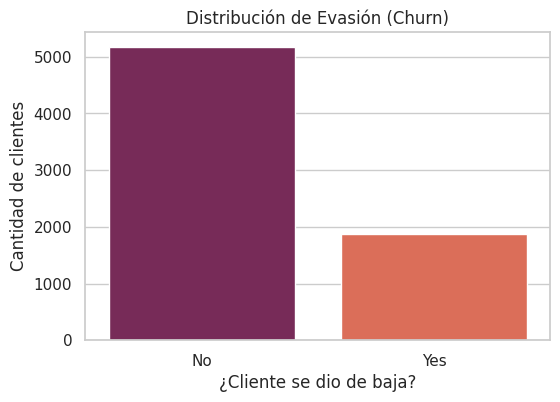

In [149]:
generar_grafico("rocket")

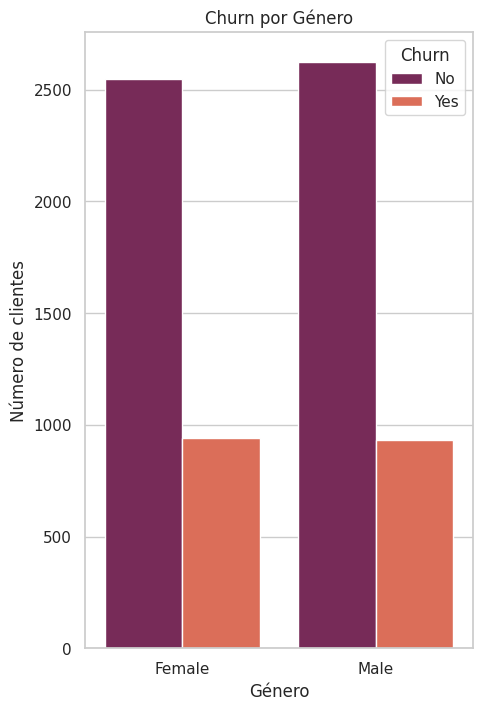

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8))
sns.countplot(data=df, x="gender", hue="Churn", palette="rocket")
plt.title("Churn por Género")
plt.xlabel("Género")
plt.ylabel("Número de clientes")
plt.show()


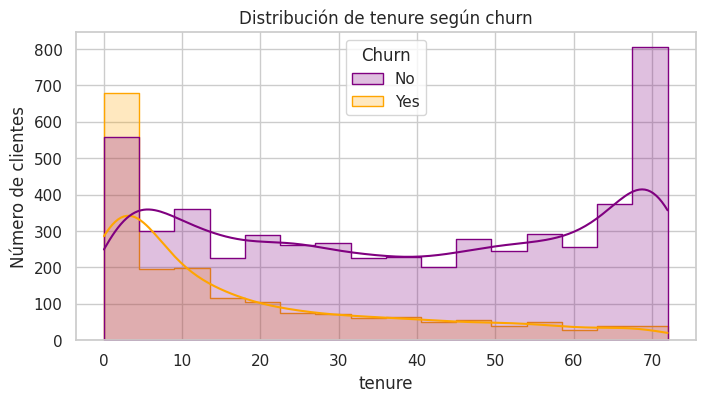

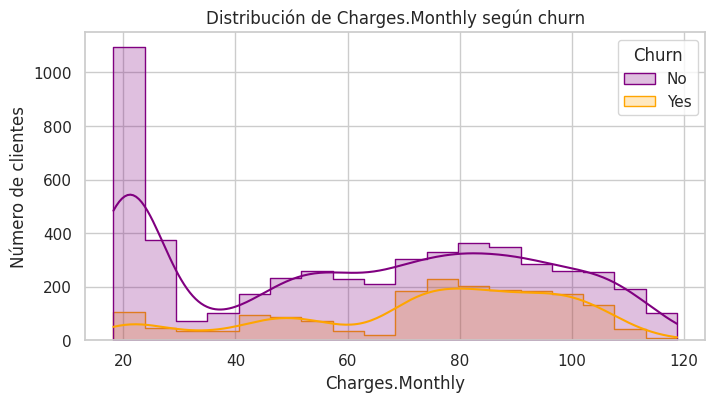

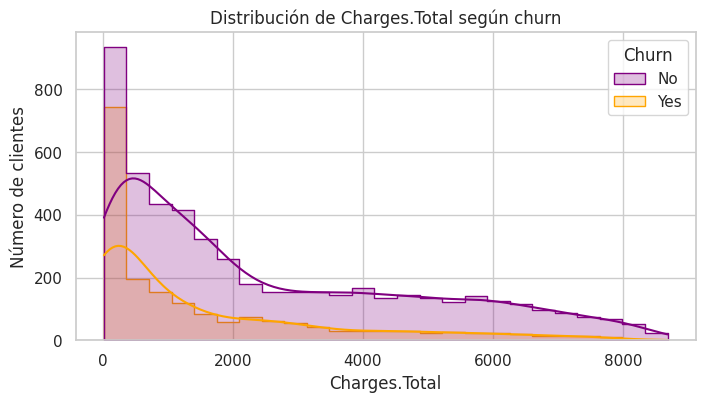

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt

numericas = ["tenure", "Charges.Monthly", "Charges.Total"]  # agrega más si tienes

for col in numericas:
    plt.figure(figsize=(8,4))
    sns.histplot(data=df, x=col, hue="Churn", kde=True, palette=["purple", "orange"], element="step")
    plt.title(f"Distribución de {col} según churn")
    plt.xlabel(col)
    plt.ylabel("Número de clientes")
    plt.show()